# Housing Notebook <br> ~Ram Adesara

---

### This notebook will examine housing in Pittsburgh, specifically, the percentage of occupied units, the median home value, and the established average years of residence. These factors, out of all the factors in the dataset, were the top three ones, according to a survey we conducted on Google Forms.

## The Dataset

The pandas, numpy, geopandas, matplot and the housing CSV file are imported. The CSV is saved to the variable "data" as a pandas dataframe.

In [14]:
import pandas as pd
import numpy as np
import geopandas as geo
%matplotlib inline
import matplotlib.pyplot as plt
data = pd.read_csv("housing.csv", 
                                       index_col="Neighborhood")
data.head(50)

# % Occupied Units
# Median Home Value
# Est. Avg. Years of Residence

,Sector #,Population (2010),Total # Units (2000),Total # Units (2010),% Occupied Units (2010),% Vacant Units (2010),# Occupied Units (2010),% Owner Occupied Units (2010),% Renter Occupied Units (2010),Est. Avg. Yrs. of Residence (2010),...,% Units Built before 1939,Median Home Value (2000),Med. Val. ('00 in '10 Dollars),Median Home Value (2010),% Change Real Value 2000-2010,Median Sale Price (2010),# Sales Counted (2010),Foreclosures (2008),Foreclosures (2010),% of all Housing Units Foreclosed (2010)
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Allegheny Center,3,933,675,"1,052",51.5%,48.5%,535,10.1%,89.9%,0,...,1.3%,"$86,500","$109,535","$136,300",24.4%,NaN,0,0,0,0.0%
Allegheny West,3,462,390,355,74.9%,25.1%,203,18.2%,81.8%,15,...,57.4%,"$159,700","$202,228","$123,600",-38.9%,"$309,940",7,0,1,0.3%
Allentown,6,"2,500","1,505","1,291",80.0%,20.0%,953,59.2%,40.8%,5,...,62.9%,"$34,300","$43,434","$42,200",-2.8%,"$8,500",70,27,11,0.9%
Arlington,7,"1,869",880,886,86.6%,13.4%,754,65.4%,34.6%,11,...,72.3%,"$38,800","$49,132","$44,200",-10.0%,"$15,397",34,12,13,1.5%
Arlington Heights,7,244,557,148,91.2%,8.8%,139,18.7%,81.3%,2,...,9.2%,"$45,000","$56,984","$64,400",13.0%,NaN,0,0,0,0.0%
Banksville,5,"4,144","2,203","2,118",95.4%,4.6%,"2,093",49.9%,50.1%,5,...,4.6%,"$87,200","$110,421","$110,900",0.4%,"$101,431",40,7,5,0.2%
Bedford Dwellings,15,"1,202","1,049",746,87.3%,12.7%,695,7.6%,92.4%,2,...,38.6%,"$17,200","$21,780","$81,100",272.4%,$200,1,0,1,0.1%
Beechview,5,"7,974","4,048","3,939",89.3%,10.7%,"3,518",58.7%,41.3%,6,...,42.7%,"$56,150","$71,103","$72,400",1.8%,"$36,068",128,64,40,1.0%
Beltzhoover,6,"1,925","1,298","1,085",73.5%,26.5%,849,73.5%,26.5%,17,...,67.4%,"$34,000","$43,054","$36,000",-16.4%,"$2,744",39,12,11,1.0%


This is a preview of our housing dataset. It consists of many different columns which provide information about housing in Pittsburgh.

## Percentage Occupied Units Analysis

There are a few things required to be done before the analysis of the first column, percentage of occupied units, can be analyzed. Firstly, the percentage symbol of each cell from this column is stripped away using rstrip() and the data is converted from a string to a float. This column is now numerical.

Next, a new dataframe called "units" is created which consists of the names of the Pittsburgh neighborhoods, as well as the numerical values of the percentage of occupied units column.

The mean is calculated, converted to a float, and saved to the variable, "mean".

In [15]:
# % Occupied Units
# Median Home Value (2010)
# Est. Avg. Years of Residence
count = 0
for x in data["% Occupied Units (2010)"]:
     x = str(x).rstrip('%')
     data.iloc[count, 4] = float(x)
     count+=1

units = data.sort_values(by=['% Occupied Units (2010)'], ascending = False).iloc[0:, 4:5]

    
#mean is calculated
mean = float(units.mean())
print(mean*0.93)

units["Falls Below Avg Percentage Occupied Units?"] = np.nan
#only values a certain quantity less than the mean are printed
c = 0
for x in range(len(units)):
    #put the special fraction here, based on the survey (out of 5)
    temp = units.iloc[x,0]
    if (temp < mean*0.93):
        units.iloc[x,1] = "Yes"
        c+=1
    else:
        units.iloc[x,1] = "No:("
units

79.06446666666666


,% Occupied Units (2010),Falls Below Avg Percentage Occupied Units?
Neighborhood,,
Chateau,100,No:(
Swisshelm Park,96.3,No:(
Ridgemont,95.9,No:(
Banksville,95.4,No:(
Oakwood,95.4,No:(
...,...,...
Homewood South,71.6,Yes
South Shore,66.7,Yes
Northview Heights,63.6,Yes


thingamagijaifiasjdifjaisdfjisdjfijfijasdoifhosadih

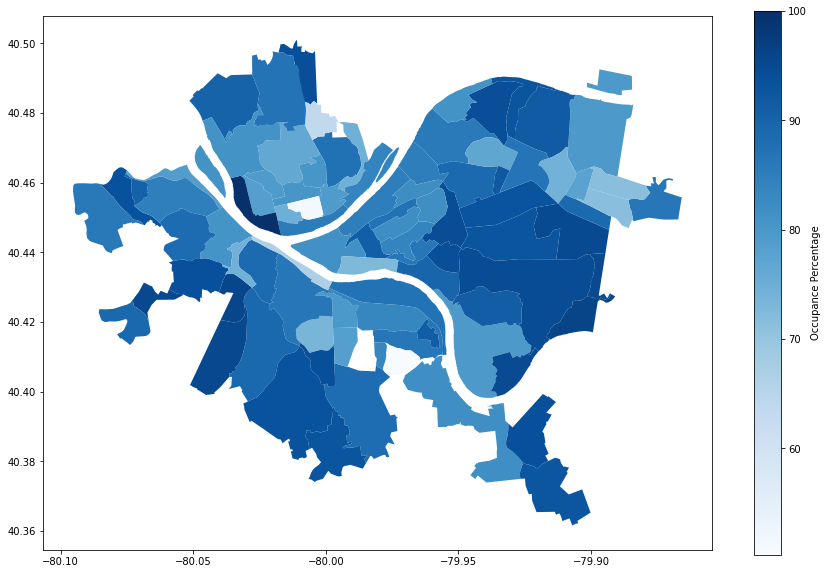

In [3]:
occ_series = units.groupby("Neighborhood").sum()['% Occupied Units (2010)']
neighborhoods = geo.read_file("Neighborhoods/Neighborhoods_.shp")
occ_map = neighborhoods.merge(occ_series, how='left', left_on='hood', right_on='Neighborhood')
occ_map.plot(column='% Occupied Units (2010)',
                  cmap='Blues',
                  figsize=(15,10), 
                  legend=True,
                  legend_kwds={'label':"Occupance Percentage"}
                  )

asdfasdfasdfasdf

## Median Home Value Analysis

In [51]:
count = 0
for x in data["Median Home  Value (2010)"]:
    x = str(x).replace('$','')
    x = str(x).replace(',','')
    data.iloc[count, 20] = float(x)
    count+=1
    
mhv_units = data.sort_values(by=["Median Home  Value (2010)"], ascending=False).iloc[0:, 20:21]

mhv_mean = float(mhv_units.mean())
print(mhv_mean)

mhv_units["Falls Below Avg Median Home Value?"] = np.nan

c = 0
for x in range(len(mhv_units)):
    mhv_temp = mhv_units.iloc[x,0]
    if mhv_temp < mhv_mean:
        mhv_units.iloc[x,1] = "Yes!"
        c+=1
    else:
        mhv_units.iloc[x,1] = "No :("
        
mhv_units

89655.58823529411


,Median Home Value (2010),Falls Below Avg Median Home Value?
Neighborhood,,
Squirrel Hill North,344900,No :(
North Oakland,273000,No :(
Shadyside,264860,No :(
Point Breeze,240300,No :(
Squirrel Hill South,201400,No :(
...,...,...
Chateau,NaN,No :(
Glen Hazel,NaN,No :(
North Shore,NaN,No :(


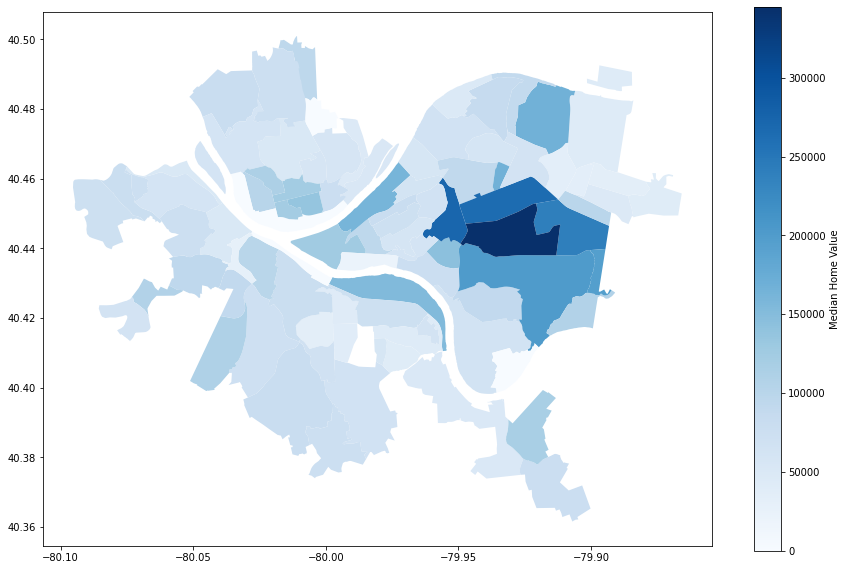

In [50]:
# occ_series = units.groupby("Neighborhood").sum()['% Occupied Units (2010)']
# neighborhoods = geo.read_file("Neighborhoods/Neighborhoods_.shp")
# occ_map = neighborhoods.merge(occ_series, how='left', left_on='hood', right_on='Neighborhood')
# occ_map.plot(column='% Occupied Units (2010)',
#                   cmap='Blues',
#                   figsize=(15,10), 
#                   legend=True,
#                   legend_kwds={'label':"Occupance Percentage"}
#                   )

mhv_series = mhv_units.groupby("Neighborhood").sum()['Median Home  Value (2010)']
neighborhoods = geo.read_file("Neighborhoods/Neighborhoods_.shp")
mhv_map = neighborhoods.merge(mhv_series, how='left', left_on='hood', right_on='Neighborhood')
mhv_map.plot(column='Median Home  Value (2010)',
                    cmap='Blues',
                    figsize=(15,10),
                    legend=True,
                    legend_kwds={'label':"Median Home Value"}
                    )

## Established Average Years of Residence Analysis

In [59]:
# count = 0
# for x in data["Median Home  Value (2010)"]:
#     x = str(x).replace('$','')
#     x = str(x).replace(',','')
#     data.iloc[count, 20] = float(x)
#     count+=1
    
# mhv_units = data.sort_values(by=["Median Home  Value (2010)"], ascending=False).iloc[0:, 20:21]

# mhv_mean = float(mhv_units.mean())
# print(mhv_mean)

# mhv_units["Falls Below Avg Median Home Value?"] = np.nan

# c = 0
# for x in range(len(mhv_units)):
#     mhv_temp = mhv_units.iloc[x,0]
#     if mhv_temp < mhv_mean:
#         mhv_units.iloc[x,1] = "Yes!"
#         c+=1
#     else:
#         mhv_units.iloc[x,1] = "No :("
        
# mhv_units

count = 0
for x in data["Est. Avg. Yrs. of Residence (2010)"]:
    data.iloc[count, 9] = float(x)
    count+=1
    
yres_units = data.sort_values(by=["Est. Avg. Yrs. of Residence (2010)"], ascending=False).iloc[0:, 9:10]

yres_mean = float(yres_units.mean())

yres_units["Falls Below Est. Avg. Yrs. of Residence?"] = np.nan

c = 0
for x in range(len(yres_units)):
    yres_temp = yres_units.iloc[x,0]
    if yres_temp < yres_mean:
        yres_units.iloc[x,1] = "Yes !"
        c+=1
    else:
        yres_units.iloc[x,1] = "No :("
        
yres_units.sample(20)

,Est. Avg. Yrs. of Residence (2010),Falls Below Est. Avg. Yrs. of Residence?
Neighborhood,,
Larimer,12.0,No :(
Beechview,6.0,Yes !
West End,4.0,Yes !
Middle Hill,4.0,Yes !
East Allegheny,4.0,Yes !
Bloomfield,3.0,Yes !
Squirrel Hill South,3.0,Yes !
Polish Hill,8.0,No :(
Central Lawrenceville,6.0,Yes !


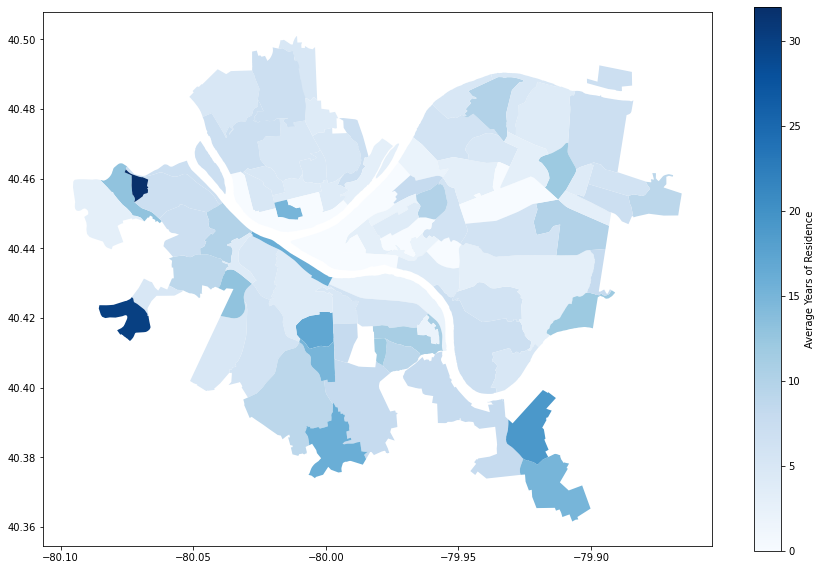

In [61]:
# occ_series = units.groupby("Neighborhood").sum()['% Occupied Units (2010)']
# neighborhoods = geo.read_file("Neighborhoods/Neighborhoods_.shp")
# occ_map = neighborhoods.merge(occ_series, how='left', left_on='hood', right_on='Neighborhood')
# occ_map.plot(column='% Occupied Units (2010)',
#                   cmap='Blues',
#                   figsize=(15,10), 
#                   legend=True,
#                   legend_kwds={'label':"Occupance Percentage"}
#                   )

yres_series = yres_units.groupby("Neighborhood").sum()["Est. Avg. Yrs. of Residence (2010)"]
neighborhoods = geo.read_file("Neighborhoods/Neighborhoods_.shp")
yres_map = neighborhoods.merge(yres_series, how='left', left_on='hood', right_on='Neighborhood')
yres_map.plot(column='Est. Avg. Yrs. of Residence (2010)',
             cmap='Blues',
             figsize=(15,10),
             legend=True,
             legend_kwds={'label':"Average Years of Residence"}
             )

asdfasdfasdfasdf

## Conclusion